In [1]:
import librosa
from librosa.effects import trim, split
from librosa.util import fix_length
import numpy as np
from typing import List
import utils.constants as consts
from utils.displays import display_wave_form

In [2]:
# Load audio.
keyboard_sample: np.ndarray = librosa.load('../media/audio/keyboard.wav', consts.SAMPLE_RATE, mono=True)[0]

Pre onset trimming waveform

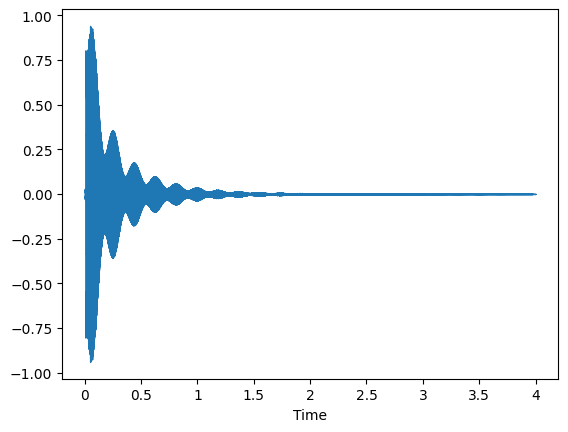

In [3]:
display_wave_form(keyboard_sample)

Trimmed waveform

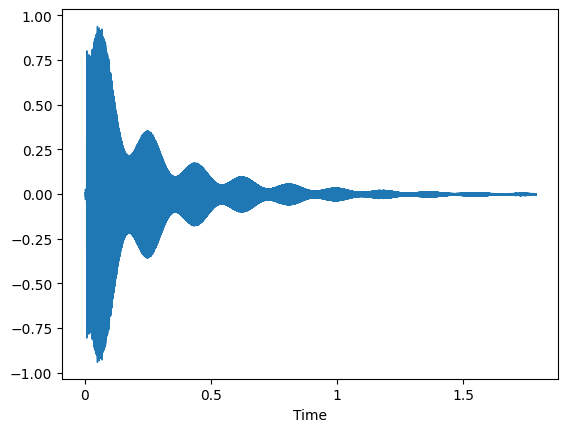

In [4]:
trimmed_sample, _ = trim(keyboard_sample, top_db=consts.TRIM_DB)

display_wave_form(trimmed_sample)

Windowing

In [5]:
def window_signal(audio_signal: np.ndarray, window_step_size: int = consts.SAMPLE_RATE) -> np.ndarray:
    """
    :param: audio_signal:
    :param: window_step_size:
    :return:
    """

    # Pad audio with 0's if it's less than a second and return resulting signal.
    if audio_signal.size < consts.SAMPLE_RATE:
        sample = fix_length(audio_signal, consts.SAMPLE_RATE)

        return sample

    start_index: int = 0
    all_audio_segments: List[np.ndarray] = []

    while start_index < audio_signal.size:
        try:
            one_second_sample: np.ndarray = audio_signal[start_index: start_index + consts.SAMPLE_RATE]

        except IndexError:
            one_second_sample: np.ndarray = audio_signal[start_index:]

        all_audio_segments.append(one_second_sample)
        start_index += window_step_size